In [6]:
import matplotlib.pyplot as plt
import json

In [2]:
# Load data from JSON file
json_file_1 = "logs/label_permuted_cifar10_stats/UPGD_SGD/convolutional_network_relu_with_hooks/lr_0.01_beta_utility_0.999_sigma_0.001_weight_decay_0.0/19.json"  # Replace with your JSON file path
json_file_2 = "logs/label_permuted_cifar10_stats/UPGDScaledAdativeNormNoiseDLearner/convolutional_network_relu_with_hooks/lr_0.01_beta_utility_0.999_sigma_0.001_weight_decay_0.0/19.json"

with open(json_file_1, "r") as file:
    data_1= json.load(file)
with open(json_file_2, "r") as file:
    data_2 = json.load(file)


# Extract accuracies and plasticity for both models
accuracies2 = data_2["accuracies"]
plasticity2 = data_2["plasticity_per_task"]
accuracies1 = data_1["accuracies"]
plasticity1 = data_1["plasticity_per_task"]


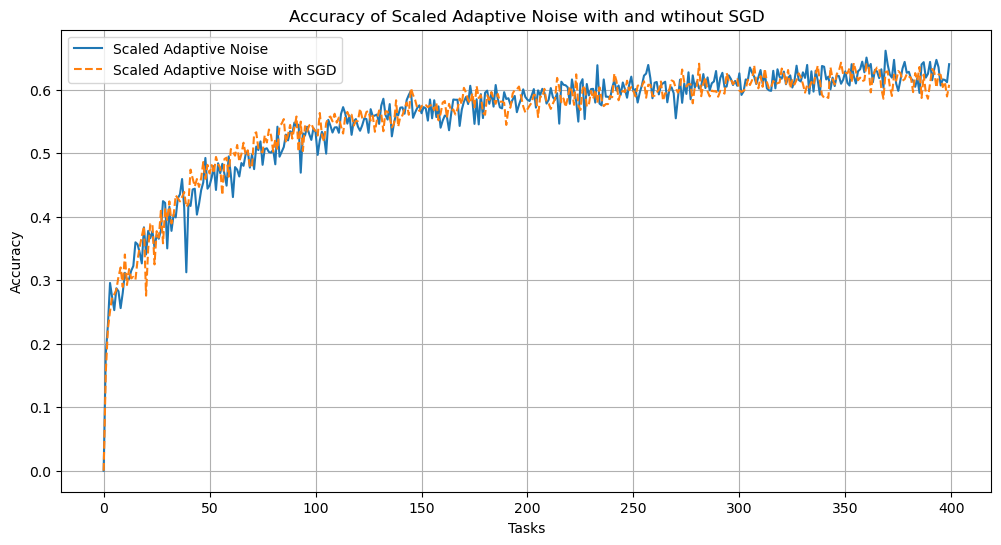

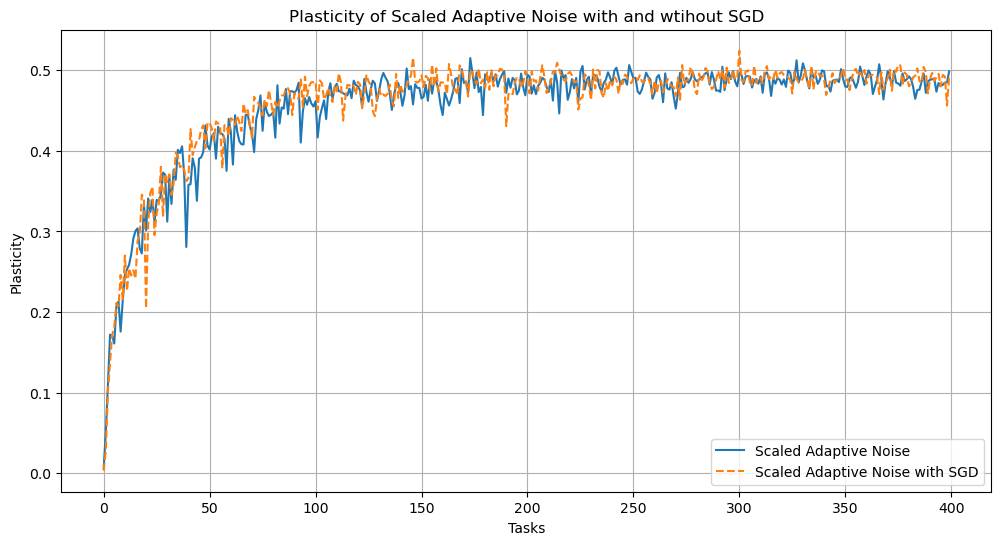

In [5]:
# Ensure equal lengths for plotting plasticity
min_length_plasticity = min(len(plasticity2), len(plasticity1))
plasticity2 = plasticity2[:min_length_plasticity]
plasticity1 = plasticity1[:min_length_plasticity]

# Create x-axis for tasks
tasks_kernel = list(range(len(accuracies2)))
tasks_global = list(range(len(accuracies1)))
tasks_plasticity = list(range(min_length_plasticity))

# Plot accuracies
plt.figure(figsize=(12, 6))
plt.plot(tasks_kernel, accuracies2, label="Scaled Adaptive Noise", linestyle='-')
plt.plot(tasks_global, accuracies1, label="Scaled Adaptive Noise with SGD", linestyle='--')
plt.title("Accuracy of Scaled Adaptive Noise with and wtihout SGD")
plt.xlabel("Tasks")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot plasticity
plt.figure(figsize=(12, 6))
plt.plot(tasks_plasticity, plasticity2, label="Scaled Adaptive Noise", linestyle='-')
plt.plot(tasks_plasticity, plasticity1, label="Scaled Adaptive Noise with SGD", linestyle='--')
plt.title("Plasticity of Scaled Adaptive Noise with and wtihout SGD")
plt.xlabel("Tasks")
plt.ylabel("Plasticity")
plt.legend()
plt.grid(True)
plt.show()


### Clipped Gradient

In [7]:
# Load data from JSON file
json_file_1 = "logs/label_permuted_cifar10_stats/UPGD_DynamicclippedGradient/convolutional_network_relu_with_hooks/lr_0.01_beta_utility_0.999_sigma_0.001_weight_decay_0.0/19.json"  # Replace with your JSON file path
json_file_2 = "logs/label_permuted_cifar10_stats/UPGDScaledAdativeNormNoiseDLearner/convolutional_network_relu_with_hooks/lr_0.01_beta_utility_0.999_sigma_0.001_weight_decay_0.0/19.json"

with open(json_file_1, "r") as file:
    data_1= json.load(file)
with open(json_file_2, "r") as file:
    data_2 = json.load(file)


# Extract accuracies and plasticity for both models
accuracies2 = data_2["accuracies"]
plasticity2 = data_2["plasticity_per_task"]
accuracies1 = data_1["accuracies"]
plasticity1 = data_1["plasticity_per_task"]

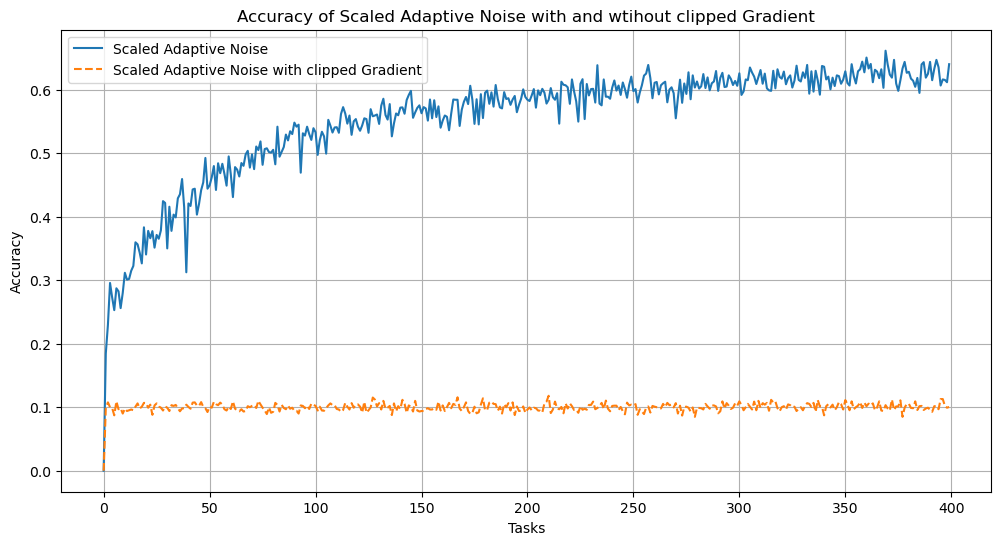

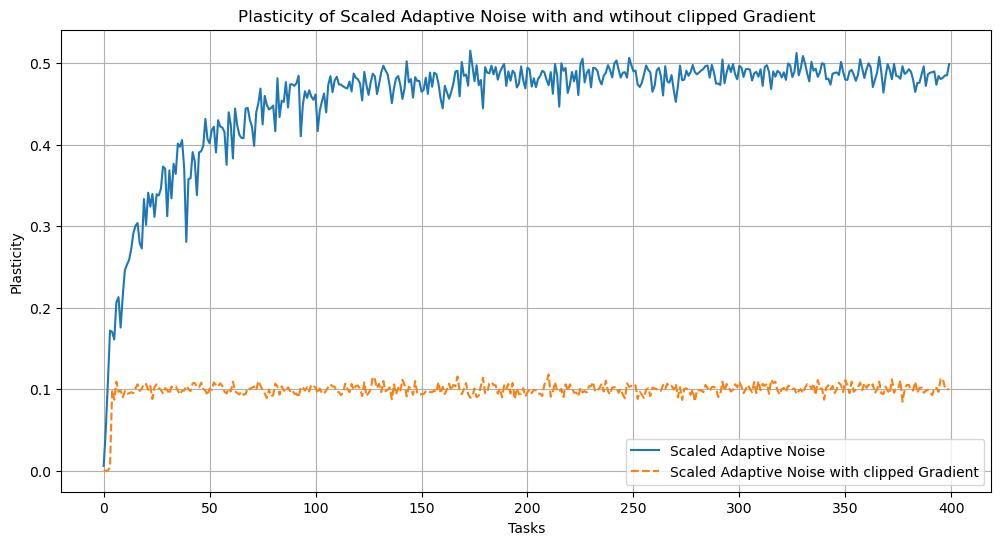

In [8]:
# Ensure equal lengths for plotting plasticity
min_length_plasticity = min(len(plasticity2), len(plasticity1))
plasticity2 = plasticity2[:min_length_plasticity]
plasticity1 = plasticity1[:min_length_plasticity]

# Create x-axis for tasks
tasks_kernel = list(range(len(accuracies2)))
tasks_global = list(range(len(accuracies1)))
tasks_plasticity = list(range(min_length_plasticity))

# Plot accuracies
plt.figure(figsize=(12, 6))
plt.plot(tasks_kernel, accuracies2, label="Scaled Adaptive Noise", linestyle='-')
plt.plot(tasks_global, accuracies1, label="Scaled Adaptive Noise with clipped Gradient", linestyle='--')
plt.title("Accuracy of Scaled Adaptive Noise with and wtihout clipped Gradient")
plt.xlabel("Tasks")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot plasticity
plt.figure(figsize=(12, 6))
plt.plot(tasks_plasticity, plasticity2, label="Scaled Adaptive Noise", linestyle='-')
plt.plot(tasks_plasticity, plasticity1, label="Scaled Adaptive Noise with clipped Gradient", linestyle='--')
plt.title("Plasticity of Scaled Adaptive Noise with and wtihout clipped Gradient")
plt.xlabel("Tasks")
plt.ylabel("Plasticity")
plt.legend()
plt.grid(True)
plt.show()
